In [21]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('cleveland.xlsx')
df2 = pd.read_excel('hungary.xlsx')
df3 = pd.read_excel('switzerland.xlsx')
df4 = pd.read_excel('us_california.xlsx')

print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())


   63  1  1.0.1  145  233  1.0.2  2  150  0  2.3  3 0.0.1  6  0.1  1.1
0  67  1      4  160  286      0  2  108  1  1.5  2     3  3    2    1
1  67  1      4  120  229      0  2  129  1  2.6  2     2  7    1    1
2  37  1      3  130  250      0  0  187  0  3.5  3     0  3    0    1
3  41  0      2  130  204      0  2  172  0  1.4  1     0  3    0    1
4  56  1      2  120  236      0  0  178  0  0.8  1     0  3    0    1
   40  1  2  140  289  0  0.1  172  0.2  0.3  3 0.0.1  6  0.4  3.1
0  49  0  3  160  180  0    0  156    0  1.0  2     3  3    1    3
1  37  1  2  130  283  0    1   98    0  0.0  2     2  7    0    3
2  48  0  4  138  214  0    0  108    1  1.5  3     0  3    3    3
3  54  1  3  150   -9  0    0  122    0  0.0  1     0  3    0    3
4  39  1  3  120  339  0    0  170    0  0.0  1     0  3    0    3
     32    1  1.1   95    0  1.0.2 0.1  127 0.2  0.7 1.2 0.0.1 ?.2  1.3    2
0  34.0  1.0  4.0  115  0.0    0.0   ?  154   0  0.2   1     3   ?  1.0  2.0
1  35.0  1.0  4.0 

In [22]:
cols = [
    'age','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','target','country'
]

df1.columns = cols
df2.columns = cols
df3.columns = cols
df4.columns = cols


In [23]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)


In [24]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()


In [25]:
df = df.astype(float)


In [26]:
df['target'] = (df['target'] > 0).astype(int)


In [27]:
df.info()
df.head()
df['country'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 908
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       724 non-null    float64
 1   sex       724 non-null    float64
 2   cp        724 non-null    float64
 3   trestbps  724 non-null    float64
 4   chol      724 non-null    float64
 5   fbs       724 non-null    float64
 6   restecg   724 non-null    float64
 7   thalach   724 non-null    float64
 8   exang     724 non-null    float64
 9   oldpeak   724 non-null    float64
 10  slope     724 non-null    float64
 11  ca        724 non-null    float64
 12  thal      724 non-null    float64
 13  target    724 non-null    int64  
 14  country   724 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 90.5 KB


country
1.0    296
3.0    288
4.0     85
2.0     55
Name: count, dtype: int64

In [28]:
df.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_angina',
}, inplace=True)


In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df = df.drop_duplicates()

In [33]:
df.describe()

,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,ca,thal,target,country
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,52.591978,0.749654,3.208852,132.247580,213.947441,0.031812,0.579530,139.420470,0.377593,0.911757,1.677732,0.688797,4.827109,0.506224,2.222683
std,9.355153,0.433512,0.944046,19.279425,102.359762,1.013939,0.907171,25.927188,0.599997,1.092768,0.633671,0.951001,1.948573,0.500307,1.108484
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-2.000000,1.000000,0.000000,3.000000,0.000000,1.000000
25%,46.000000,0.500000,2.000000,120.000000,193.000000,0.000000,0.000000,120.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000
50%,54.000000,1.000000,4.000000,130.000000,230.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,0.000000,3.000000,1.000000,3.000000
75%,59.000000,1.000000,4.000000,140.000000,271.500000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,4.000000


In [34]:
df['target'].value_counts()

target
1    366
0    357
Name: count, dtype: int64

<Axes: >

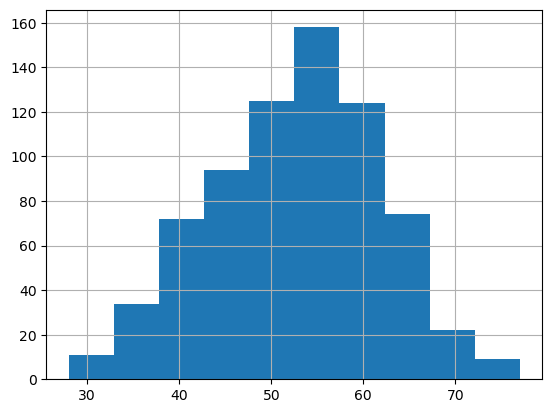

In [35]:
df['age'].hist()

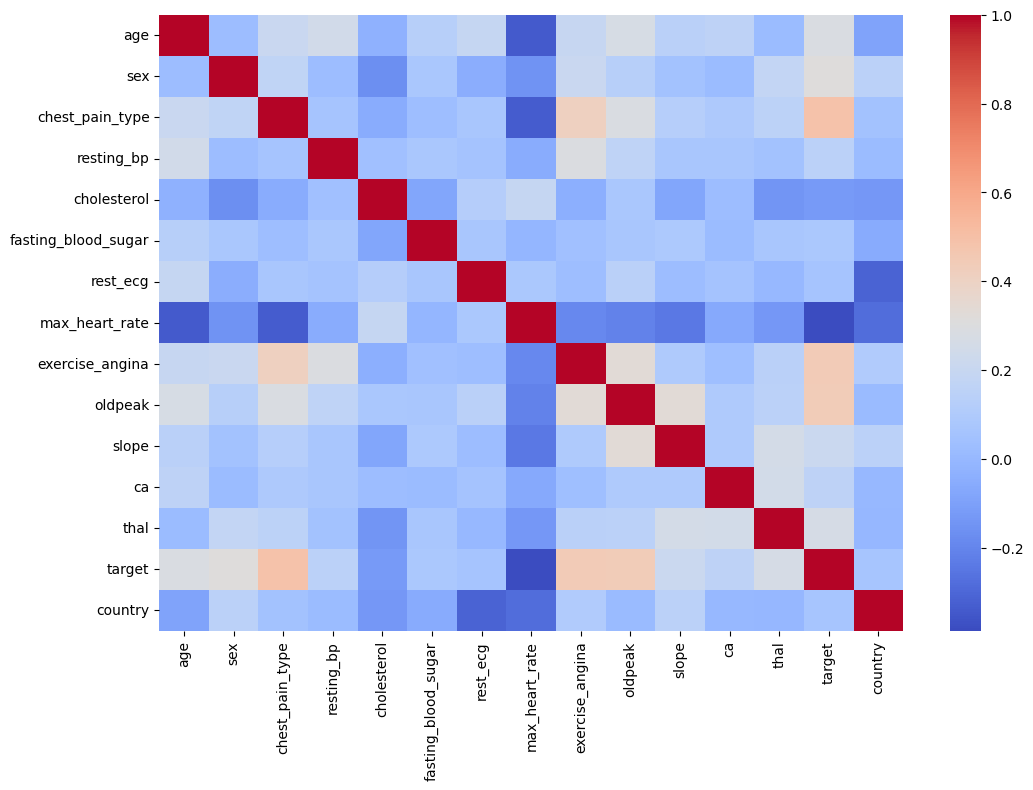

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()


In [38]:
df.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'country'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Updated categorical columns based on your column names
cat_cols = [
    'sex', 
    'chest_pain_type', 
    'fasting_blood_sugar', 
    'rest_ecg', 
    'exercise_angina', 
    'slope', 
    'thal'
]

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Verify first 5 rows
df.head()


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,oldpeak,slope,ca,thal,target,country
0,67.0,1,3,160.0,286.0,1,3,108.0,2,1.5,1,3.0,0,1,1.0
1,67.0,1,3,120.0,229.0,1,3,129.0,2,2.6,1,2.0,2,1,1.0
2,37.0,1,2,130.0,250.0,1,1,187.0,1,3.5,2,0.0,0,0,1.0
3,41.0,0,1,130.0,204.0,1,3,172.0,1,1.4,0,0.0,0,0,1.0
4,56.0,1,1,120.0,236.0,1,1,178.0,1,0.8,0,0.0,0,0,1.0


In [44]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)  # Features
y = df['target']               # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8758620689655172
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        72
           1       0.92      0.82      0.87        73

    accuracy                           0.88       145
   macro avg       0.88      0.88      0.88       145
weighted avg       0.88      0.88      0.88       145

Confusion Matrix:
 [[67  5]
 [13 60]]


In [45]:
#from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(n_estimators=100, random_state=42)
#rf.fit(X_train, y_train)

#y_pred_rf = rf.predict(X_test)

#print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Linear kernel try karte hain pehle
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.8689655172413793
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        72
           1       0.91      0.82      0.86        73

    accuracy                           0.87       145
   macro avg       0.87      0.87      0.87       145
weighted avg       0.87      0.87      0.87       145

Confusion Matrix:
 [[66  6]
 [13 60]]


In [49]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("SVM (RBF) Accuracy:", accuracy_score(y_test, y_pred_rbf))


SVM (RBF) Accuracy: 0.6827586206896552


In [46]:
def predict_heart_disease():
    print("Enter patient details:")

    age = float(input("Age: "))
    sex = int(input("Sex (0=female, 1=male): "))
    chest_pain_type = int(input("Chest Pain Type (0-3): "))
    resting_bp = float(input("Resting Blood Pressure: "))
    cholesterol = float(input("Cholesterol: "))
    fasting_blood_sugar = int(input("Fasting Blood Sugar > 120? (0=No,1=Yes): "))
    rest_ecg = int(input("Resting ECG (0-2): "))
    max_heart_rate = float(input("Maximum Heart Rate: "))
    exercise_angina = int(input("Exercise Induced Angina (0=No,1=Yes): "))
    oldpeak = float(input("ST depression (oldpeak): "))
    slope = int(input("Slope (0-2): "))
    ca = float(input("Number of major vessels (0-3): "))
    thal = int(input("Thalassemia (1=normal,2=fixed defect,3=reversible defect): "))
    country = int(input("Country (1=Cleveland, 2=Switzerland, 3=Hungary, 4=US_California): "))

    # Create dataframe for single prediction
    user_df = pd.DataFrame([[
        age, sex, chest_pain_type, resting_bp, cholesterol, fasting_blood_sugar,
        rest_ecg, max_heart_rate, exercise_angina, oldpeak, slope, ca, thal, country
    ]], columns=X.columns)

    # Feature scaling
    user_scaled = scaler.transform(user_df)

    # Prediction
    pred = model.predict(user_scaled)[0]

    if pred == 1:
        print("⚠️ Prediction: HIGH RISK of Heart Disease")
    else:
        print("✅ Prediction: LOW RISK of Heart Disease")


In [47]:
predict_heart_disease()


Enter patient details:


Age:  18
Sex (0=female, 1=male):  1
Chest Pain Type (0-3):  2
Resting Blood Pressure:  125
Cholesterol:  250
Fasting Blood Sugar > 120? (0=No,1=Yes):  1
Resting ECG (0-2):  0
Maximum Heart Rate:  120
Exercise Induced Angina (0=No,1=Yes):  0
ST depression (oldpeak):  3
Slope (0-2):  1
Number of major vessels (0-3):  2
Thalassemia (1=normal,2=fixed defect,3=reversible defect):  2
Country (1=Cleveland, 2=Switzerland, 3=Hungary, 4=US_California):  1


✅ Prediction: LOW RISK of Heart Disease
